# Data Processing

## Environment Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

sns.set_style('darkgrid')
%matplotlib inline

## Data Cleaning

In [3]:
# read in data
df_original = pd.read_csv('../data/user_fake_authentic_4class.csv')
#df_original = pd.read_csv('user_fake_authentic_4class.csv')
print(df_original.info())
print(df_original['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43307 entries, 0 to 43306
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pos     43307 non-null  int64  
 1   flw     43307 non-null  int64  
 2   flg     43307 non-null  int64  
 3   bl      43307 non-null  int64  
 4   pic     43307 non-null  int64  
 5   lin     43307 non-null  int64  
 6   cl      43307 non-null  int64  
 7   cz      43307 non-null  float64
 8   ni      43307 non-null  float64
 9   erl     43307 non-null  float64
 10  erc     43307 non-null  float64
 11  lt      43307 non-null  float64
 12  hc      43307 non-null  float64
 13  pr      43307 non-null  float64
 14  fo      43307 non-null  float64
 15  cs      43307 non-null  float64
 16  pi      43307 non-null  float64
 17  class   43307 non-null  object 
dtypes: float64(10), int64(7), object(1)
memory usage: 5.9+ MB
None
a    12054
i    10549
r    10441
s    10263
Name: class, dtype: int64


There are 43307 rows, 18 columns in this dataframe without missing values. All the users are devided into 4 classes with fairly equal size.

In [4]:
print(df_original[df_original.duplicated(keep=False)].shape)
print(df_original.loc[df_original.duplicated(keep=False),'class'].value_counts())

(1460, 18)
i    1460
Name: class, dtype: int64


There are 1460 repeated rows and they are all classified as inactive fake users.

I think it's inappropriate to delete the duplicated rows, since it is likely for the fake users to have the same behaviours, which helps indentify inactivate fake users.

In [29]:
# add a new 2-class label indicating fake users
df = df_original.copy()
df['fake user'] = (df_original['class'] != 'r').astype(int)
x = df.iloc[:,:17]
y4 = df['class']
y2 = df['fake user']

# add a one-hot-encoding for y4
y4_oh = pd.get_dummies(y4)
y4_oh

a  i  r  s
0      0  0  1  0
1      0  0  1  0
2      0  0  1  0
3      0  0  1  0
4      0  0  1  0
...   .. .. .. ..
43302  1  0  0  0
43303  0  1  0  0
43304  0  1  0  0
43305  0  1  0  0
43306  0  0  0  1

[43307 rows x 4 columns]

In [6]:
# factor x section
#x['pic'] = x['pic'].astype(bool)
#x['lin'] = x['lin'].astype(bool)
x

pos   flw   flg   bl  pic  lin   cl        cz     ni        erl   erc  \
0       69   541   440  293    1    0  223  0.000000  0.111  10.120000  0.50   
1        9   783   803   76    1    0  101  0.000000  0.000  19.820000  1.99   
2      390  1200   925  103    1    0  723  0.000000  0.000  11.540000  0.76   
3      138  1100  1000   40    1    0   24  0.166667  0.167  20.440001  1.61   
4        1   228   487   84    1    0   30  0.000000  0.000   9.210000  1.75   
...    ...   ...   ...  ...  ...  ...  ...       ...    ...        ...   ...   
43302   34   421   705    0    1    0    0  1.000000  0.333  13.130000  0.01   
43303    3    26   124    0    1    0    0  1.000000  0.000  20.510000  1.28   
43304   10   323  1500    0    1    0    0  1.000000  0.100   4.020000  0.15   
43305    3   317  1000    0    1    0   12  0.333333  0.333  13.880000  0.63   
43306  154  1900  6300  353    1    0  285  0.000000  0.389   5.940000  0.07   

          lt     hc   pr   fo        cs           pi  
0      0.944  0.556  0.0  0.0  0.107055   334.596802  
1      0.889  0.222  0.0  0.0  0.007400  2137.979248  
2      1.000  2.389  0.0  0.0  0.221954    96.244957  
3      0.833  0.111  0.0  0.0  0.025055   226.622437  
4      1.000  0.000  0.0  0.0  0.000000     0.000000  
...      ...    ...  ...  ...       ...          ...  
43302  0.000  0.000  0.0  0.0  1.000000   293.514740  
43303  0.667  0.000  0.0  0.0  1.000000  3049.940186  
43304  0.000  0.000  0.0  0.0  1.000000    89.871666  
43305  0.333  0.000  0.0  0.0  0.000000     9.767870  
43306  0.111  1.333  0.0  0.0  0.294644   418.756989  

[43307 rows x 17 columns]

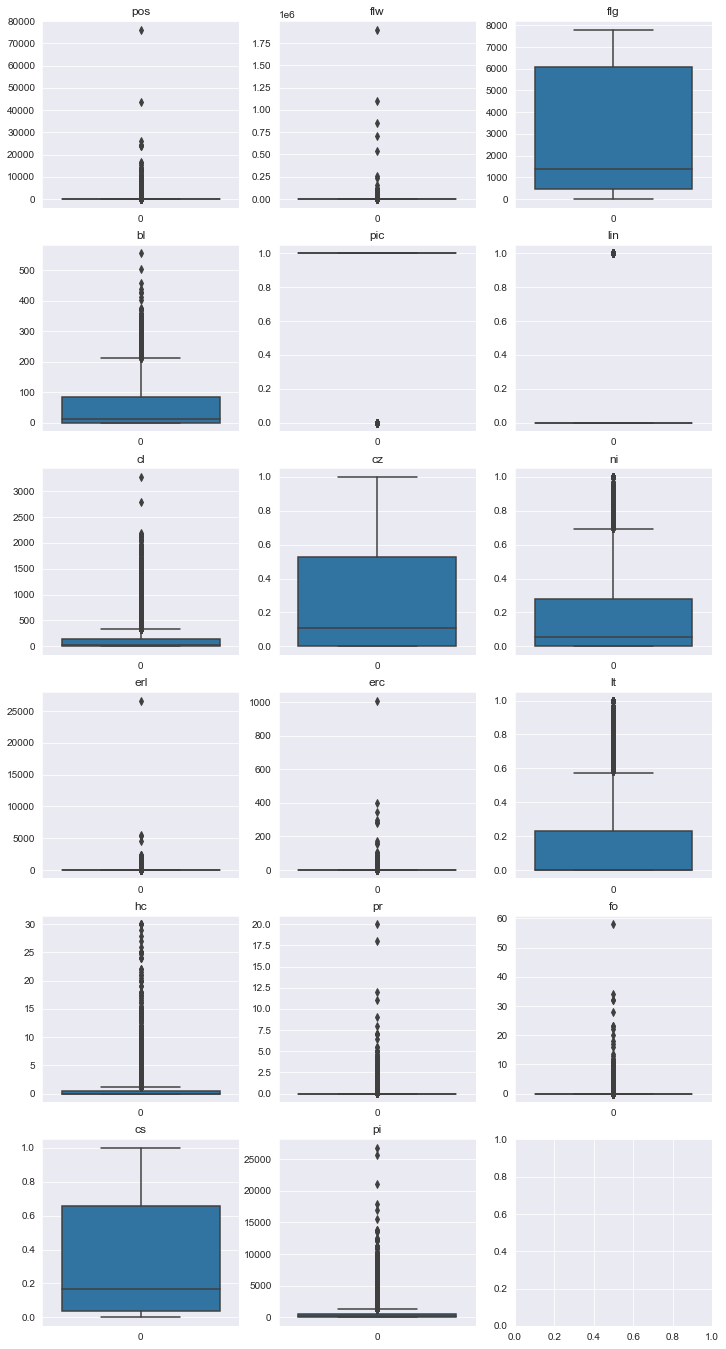

In [7]:
# detecting outliers
def plot_boxplot(df):
    fig,ax = plt.subplots(6, 3, figsize=(12,24))
    for i in range(df.shape[1]):
        plt.subplot(6,3,i+1)
        ax = sns.boxplot(data = df.iloc[:,i])
        ax.set_title(df.columns[i])
def plot_histplot(df):
    fig,ax = plt.subplots(6, 3, figsize=(12,24))
    for i in range(df.shape[1]):
        plt.subplot(6,3,i+1)
        ax = sns.histplot(data = df.iloc[:,i])
plot_boxplot(x)

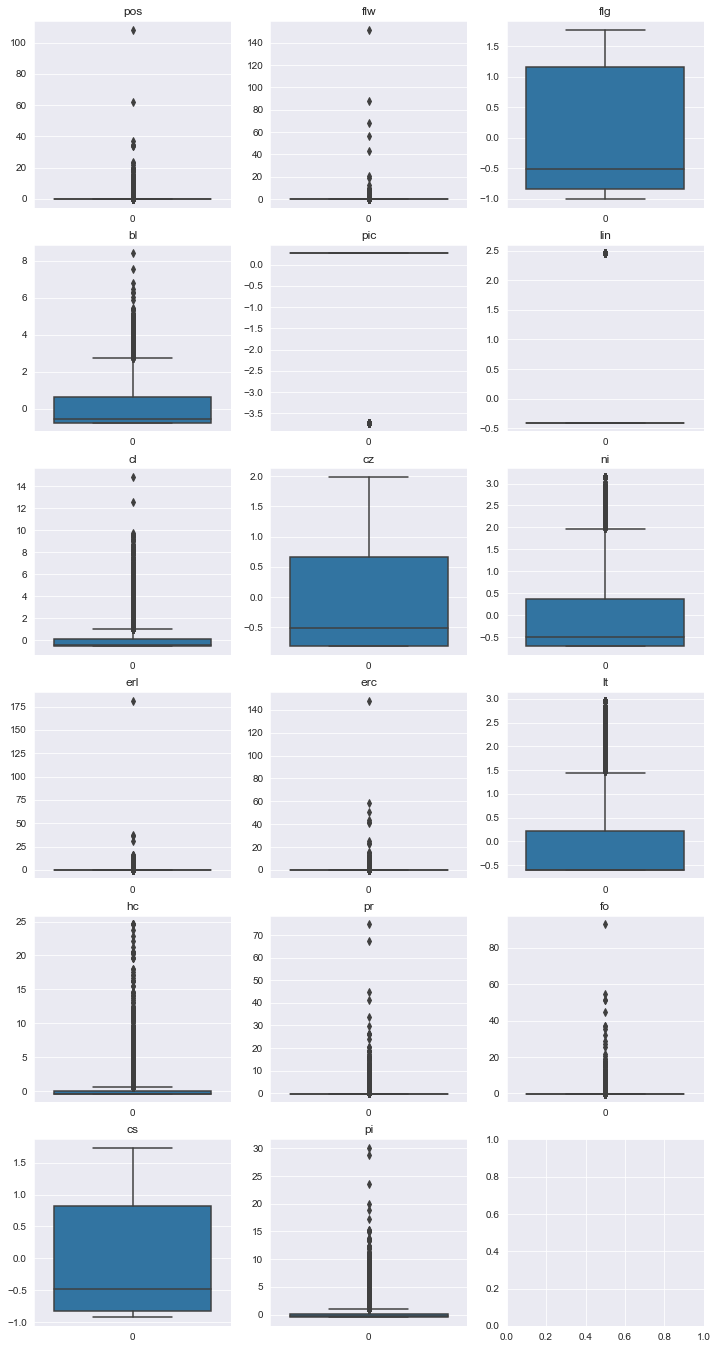

In [8]:
# try to use zscore (hard to detect)
zscores = (x - x.mean())/x.std()
temp_list = ['flg','pic','lin','cz','ni','lt','cs']  # no need to do with outliers
check_list = [i for i in x.columns.values.tolist() if i not in temp_list] # need to do with outliers
plot_boxplot(zscores)
#plot_histplot(zscores)

In [9]:
# try to use 1.5*IQR

def iqr(df, low=0.25, high=0.75):
    pl, ph = df.quantile(low), df.quantile(high)
    iqr = ph - pl
    temp_bool = (df < ph+(1.5*iqr)) & (df > pl-(1.5*iqr)) # true when not outliers
    return temp_bool

x_iqr_bool = pd.DataFrame(index=x.index)
for i in check_list:
    x_iqr_bool = x_iqr_bool.join(pd.DataFrame(data=iqr(x[i]),index=x.index))
(x_iqr_bool.sum(axis = 1) == 10).sum()
# no perfect rows with these quantiles

x_iqr_bool = pd.DataFrame(index=x.index)
for i in check_list:
    x_iqr_bool = x_iqr_bool.join(pd.DataFrame(data=iqr(x[i],0.1,0.9),index=x.index))
(x_iqr_bool.sum(axis = 1) == 10).sum()
iqr_index = x_iqr_bool.sum(axis = 1) == 10


x_features = x.loc[iqr_index]
y2_iqr = y2[iqr_index]
y4_iqr = y4[iqr_index]
print(x_features.shape)
#plot_boxplot(x_features)
#plot_histplot(x_features)

(33512, 17)


In [10]:
# standardize features
from sklearn.preprocessing import StandardScaler

def ss_function(x_train, x_test):
    ss_index = ['pos','flg','flw','bl','cl','erl','erc','hc','pr','fo','cs','pi']
    ss = StandardScaler()

    x_train_ss = pd.DataFrame(ss.fit_transform(x_train[ss_index]), columns=x_train[ss_index].columns, 
                             index=x_train.index)
    x_train_ss = x_train_ss.join(x_train[['pic','lin','cz','ni','lt']])
    
    x_test_ss = pd.DataFrame(ss.transform(x_test[ss_index]), columns=x_test[ss_index].columns, 
                             index=x_test.index)
    x_test_ss = x_test_ss.join(x_test[['pic','lin','cz','ni','lt']])
    
    return x_train_ss, x_test_ss

## Feature Selection

In this section, I use random forest classfier and lasso to do feature selection. 

In [11]:
# 4-class situation
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(x_features, y4_iqr, test_size=0.1, 
                                                        stratify=y4_iqr, random_state=123)

x4_train, x4_test = ss_function(x4_train, x4_test)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators':[i for i in range(10,30)],
         'max_depth':[i for i in range(3,10)]}
gscv = GridSearchCV(RandomForestClassifier(random_state=123), param_grid=params, cv=5, refit=True)
gscv.fit(x4_train, y4_train)
gscv.best_params_

{'max_depth': 9, 'n_estimators': 29}

<AxesSubplot:>

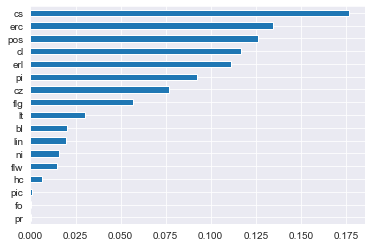

In [13]:
fi4 = pd.Series(data = gscv.best_estimator_.feature_importances_, index = x4_train.columns)
fi4.sort_values().plot.barh()
# this is the plot of feature importance in 4-class situation
# the top 6 features are suggested to be chosen

In [14]:
# 2-class lasso
x2_train, x2_test, y2_train, y2_test = train_test_split(x_features, y2_iqr, test_size = 0.1,
                                                       stratify=y2_iqr, random_state=123)

x2_train, x2_test = ss_function(x2_train, x2_test)

In [15]:
from sklearn.linear_model import LogisticRegression
params_lr = {'C':np.linspace(0.1,10,num=100).tolist()}
gscv_lr = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', random_state=123),
                      param_grid=params_lr, cv=5, refit=True)
gscv_lr.fit(x2_train, y2_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', random_state=123,
                                          solver='liblinear'),
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,
                               0.7000000000000001, 0.8, 0.9, 1.0, 1.1,
                               1.2000000000000002, 1.3000000000000003,
                               1.4000000000000001, 1.5000000000000002, 1.6,
                               1.7000000000000002, 1.8000000000000003,
                               1.9000000000000001, 2.0, 2.1, 2.2,
                               2.3000000000000003, 2.4000000000000004,
                               2.5000000000000004, 2.6, 2.7, 2.8000000000000003,
                               2.9000000000000004, 3.0000000000000004, ...]})

In [16]:
fi2 = pd.Series(data=abs(gscv_lr.best_estimator_.coef_[0].round(2)), index=x2_train.columns)
fi2.sort_values(ascending=False)
# In 2-class situation, the first 2 features should be chosen.

lt     1.67
flg    1.58
ni     1.04
lin    0.92
pic    0.63
erc    0.60
flw    0.57
cz     0.46
erl    0.43
pi     0.41
bl     0.27
cs     0.19
fo     0.16
cl     0.15
pr     0.12
pos    0.11
hc     0.08
dtype: float64

In [17]:
# 2-class randomforest

params2_rf = {'n_estimators':[i for i in range(10,30)],
         'max_depth':[i for i in range(3,10)]}
gscv2_rf = GridSearchCV(RandomForestClassifier(random_state=123), param_grid=params2_rf, cv=5, refit=True)
gscv2_rf.fit(x2_train, y2_train)
gscv2_rf.best_params_

{'max_depth': 9, 'n_estimators': 23}

<AxesSubplot:>

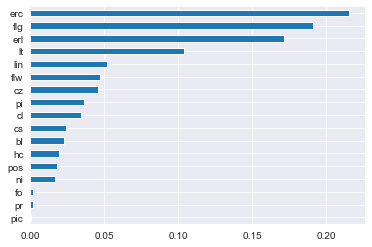

In [18]:
fi2_rf = pd.Series(data = gscv2_rf.best_estimator_.feature_importances_, index = x2_train.columns)
fi2_rf.sort_values().plot.barh()
# this is the plot of feature importance in 2-class situation (tree based)
# the top 3 features are suggested to be chosen

## Feature Extraction

(30160, 13)


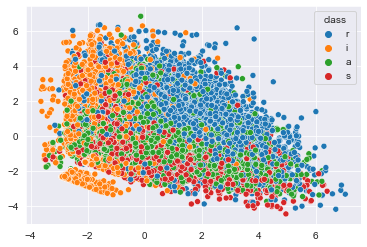

In [19]:
# 4-class situation
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ss4 = StandardScaler().fit(x4_train)
pca4 = PCA(n_components=0.9, random_state=123)

x4_train_pca = pca4.fit_transform(ss4.transform(x4_train))
x4_test_pca = pca4.transform(ss4.transform(x4_test))
print(x4_train_pca.shape)
sns.scatterplot(x=x4_train_pca[:,0], y=x4_train_pca[:,1], hue=y4_train);

(30160, 13)


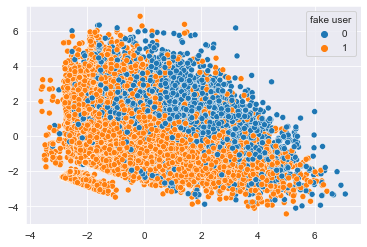

In [20]:
# 2-class situation
from sklearn.decomposition import PCA

ss2 = StandardScaler().fit(x2_train)
pca2 = PCA(n_components=0.9, random_state=123)

x2_train_pca = pca2.fit_transform(ss2.transform(x2_train))
x2_test_pca = pca2.transform(ss2.transform(x2_test))
print(x2_train_pca.shape)
sns.scatterplot(x=x2_train_pca[:,0], y=x2_train_pca[:,1], hue=y2_train);

# Visulization

In [30]:
df

pos   flw   flg   bl  pic  lin   cl        cz     ni        erl   erc  \
0       69   541   440  293    1    0  223  0.000000  0.111  10.120000  0.50   
1        9   783   803   76    1    0  101  0.000000  0.000  19.820000  1.99   
2      390  1200   925  103    1    0  723  0.000000  0.000  11.540000  0.76   
3      138  1100  1000   40    1    0   24  0.166667  0.167  20.440001  1.61   
4        1   228   487   84    1    0   30  0.000000  0.000   9.210000  1.75   
...    ...   ...   ...  ...  ...  ...  ...       ...    ...        ...   ...   
43302   34   421   705    0    1    0    0  1.000000  0.333  13.130000  0.01   
43303    3    26   124    0    1    0    0  1.000000  0.000  20.510000  1.28   
43304   10   323  1500    0    1    0    0  1.000000  0.100   4.020000  0.15   
43305    3   317  1000    0    1    0   12  0.333333  0.333  13.880000  0.63   
43306  154  1900  6300  353    1    0  285  0.000000  0.389   5.940000  0.07   

          lt     hc   pr   fo        cs           pi class  fake user  
0      0.944  0.556  0.0  0.0  0.107055   334.596802     r          0  
1      0.889  0.222  0.0  0.0  0.007400  2137.979248     r          0  
2      1.000  2.389  0.0  0.0  0.221954    96.244957     r          0  
3      0.833  0.111  0.0  0.0  0.025055   226.622437     r          0  
4      1.000  0.000  0.0  0.0  0.000000     0.000000     r          0  
...      ...    ...  ...  ...       ...          ...   ...        ...  
43302  0.000  0.000  0.0  0.0  1.000000   293.514740     a          1  
43303  0.667  0.000  0.0  0.0  1.000000  3049.940186     i          1  
43304  0.000  0.000  0.0  0.0  1.000000    89.871666     i          1  
43305  0.333  0.000  0.0  0.0  0.000000     9.767870     i          1  
43306  0.111  1.333  0.0  0.0  0.294644   418.756989     s          1  

[43307 rows x 19 columns]

<AxesSubplot:ylabel='por'>

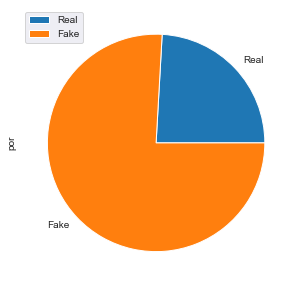

In [31]:
#original two class proportion
two_class_real = df.loc[(df.loc[:,'fake user'] == 0)]
two_class_fake = df.loc[(df.loc[:,'fake user'] == 1)]


df_temp = pd.DataFrame({'por': [len(two_class_real), len(two_class_fake)]},
                  index=["Real","Fake"])

df_temp.plot.pie(y='por', figsize=(5, 5))

10441
12054
10549
10263


<AxesSubplot:ylabel='por'>

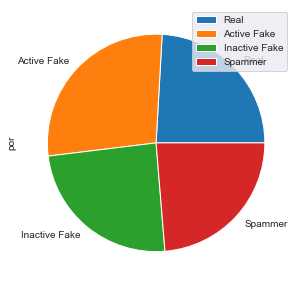

In [32]:
#original four class proportion
four_class_r = df.loc[(df.loc[:,'class'] == 'r')]
four_class_a = df.loc[(df.loc[:,'class'] == 'a')]
four_class_i = df.loc[(df.loc[:,'class'] == 'i')]
four_class_s = df.loc[(df.loc[:,'class'] == 's')]
print(len(four_class_r))
print(len(four_class_a))
print(len(four_class_i))
print(len(four_class_s))

df = pd.DataFrame({'por': [len(four_class_r), len(four_class_a),len(four_class_i),len(four_class_s)]},
                  index=["Real","Active Fake","Inactive Fake", "Spammer"])

df.plot.pie(y='por', figsize=(5, 5))

In [33]:
class4_visual = x_features.loc[:,['cs','pi','erc','cl','pos','erl']]
class2_visual = x_features.loc[:,['erc','erl','flg']]
sns.set_theme(style = 'ticks')
corr = class4_visual.corr()
corr.style.background_gradient(cmap='coolwarm')


<AxesSubplot:>

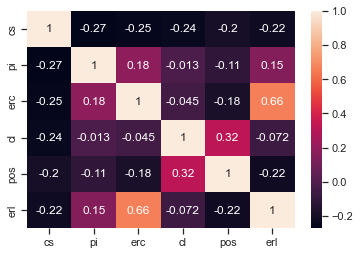

In [34]:
sns.heatmap(class4_visual.corr(),annot = True)

In [35]:
corr = class2_visual.corr()
corr.style.background_gradient(cmap='coolwarm')


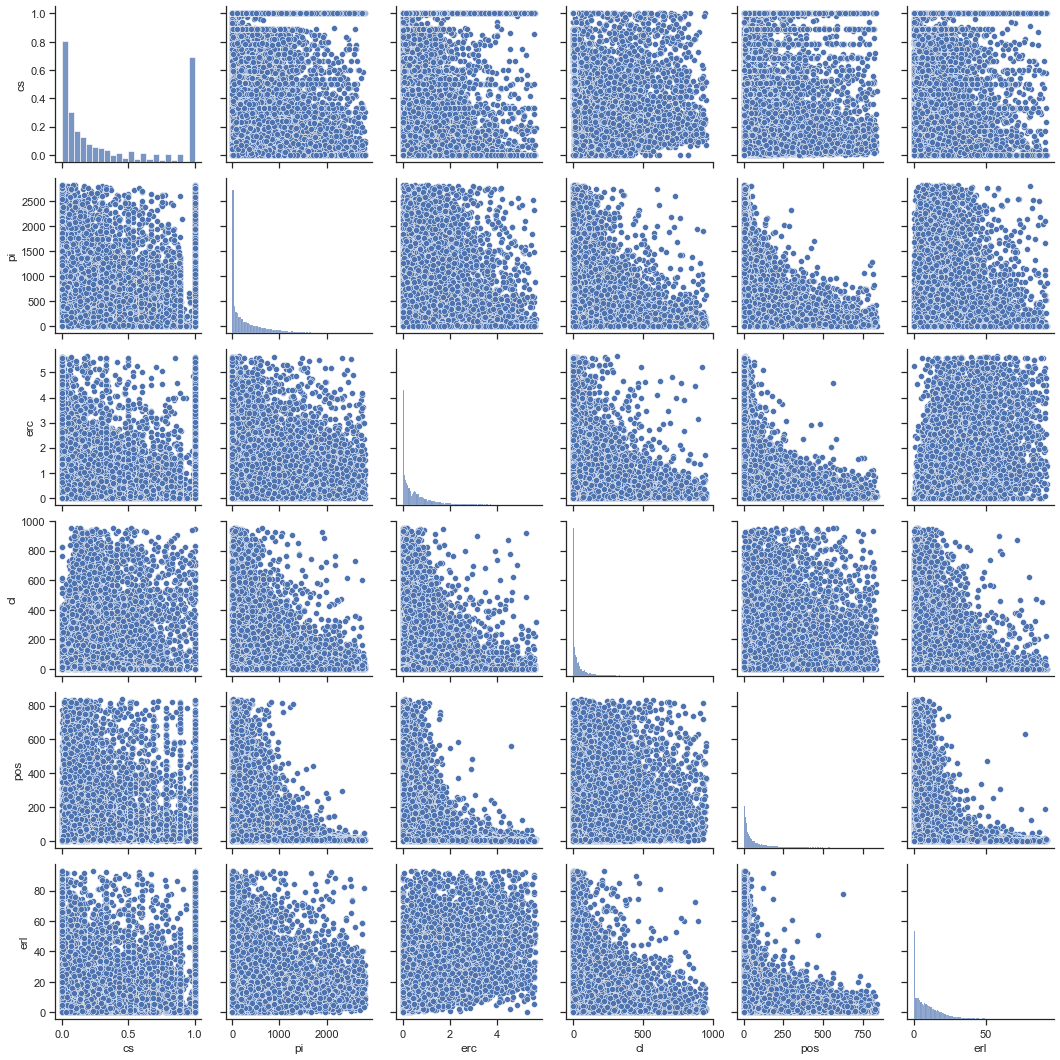

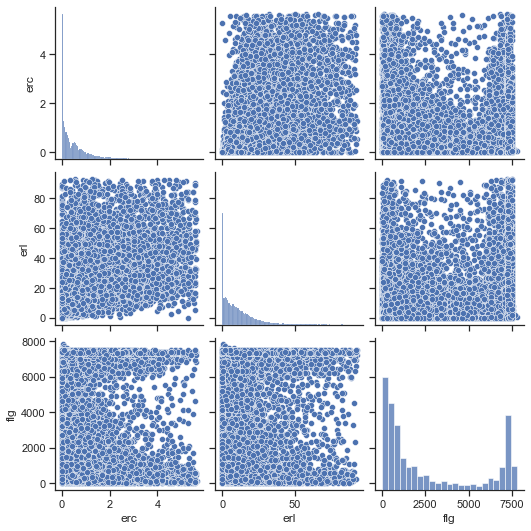

In [36]:
#scatter plot matrices
#4class
sns.pairplot(class4_visual)
plt.show()
#2class
sns.pairplot(class2_visual)
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()

#identify features belongs to which category
features_df = pd.concat([x_features, y2_iqr,y4_iqr], axis=1) #33512x19

#two class
two_class_real = ss.fit_transform(features_df.loc[(features_df.loc[:,'fake user'] == 0)].loc[:,['erc','erl','flg']]) #8520
two_class_fake = ss.fit_transform(features_df.loc[(features_df.loc[:,'fake user'] == 1)].loc[:,['erc','erl','flg']]) #24992

#four class
four_class_r = ss.fit_transform(features_df.loc[(features_df.loc[:,'class'] == 'r')].loc[:,['cs','pi','erc','cl','pos','erl']]) #8520
four_class_a = ss.fit_transform(features_df.loc[(features_df.loc[:,'class'] == 'a')].loc[:,['cs','pi','erc','cl','pos','erl']]) #10528
four_class_i = ss.fit_transform(features_df.loc[(features_df.loc[:,'class'] == 'i')].loc[:,['cs','pi','erc','cl','pos','erl']]) #8800
four_class_s = ss.fit_transform(features_df.loc[(features_df.loc[:,'class'] == 's')].loc[:,['cs','pi','erc','cl','pos','erl']]) #5664

#print(len(two_class_fake))

In [38]:
four_class_r_average = four_class_r.mean(axis = 0)
four_class_a_average = four_class_a.mean(axis = 0)
four_class_i_average = four_class_i.mean(axis = 0)
four_class_s_average = four_class_s.mean(axis = 0)
#print(four_class_s_average)

two_class_real_average = two_class_real.mean(axis = 0)
two_class_fake_average = two_class_fake.mean(axis = 0)

In [39]:
import plotly.express as px

#4 calss radar graph
df = pd.DataFrame(dict(
    r= four_class_r_average,
    theta=['post similarity','post interval','comment engagement rate',
           'average caption length', 'num posts','like engagement rate']))
fig = px.line_polar(df, r='r', theta='theta', range_r = [0,0.5], line_close=True)
fig.show()

df = pd.DataFrame(dict(
    r= four_class_a_average,
    theta=['post similarity','post interval','comment engagement rate',
           'average caption length', 'num posts','like engagement rate']))
fig = px.line_polar(df, r='r', theta='theta',range_r = [0,0.5], line_close=True)
fig.show()

df = pd.DataFrame(dict(
    r= four_class_i_average,
    theta=['post similarity','post interval','comment engagement rate',
           'average caption length', 'num posts','like engagement rate']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()

df = pd.DataFrame(dict(
    r= four_class_s_average,
    theta=['post similarity','post interval','comment engagement rate',
           'average caption length', 'num posts','like engagement rate']))
fig = px.line_polar(df, r='r', theta='theta', range_r = [0,0.5],line_close=True)
fig.show()

In [40]:
#2 calss radar graph
df = pd.DataFrame(dict(
    r= two_class_real_average,
    theta=['comment engagement rate','like engagement rate','num following']))
fig = px.line_polar(df, r='r', theta='theta', range_r = [0,0.5], line_close=True)
fig.show()

df = pd.DataFrame(dict(
    r= two_class_fake_average,
    theta=['comment engagement rate','like engagement rate','num following']))
fig = px.line_polar(df, r='r', theta='theta',range_r = [0,0.5], line_close=True)
fig.show()

# binary classification

## Random Forest

In [42]:
#Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
params2_rf = {'n_estimators':[i for i in range(10,30)],
              'max_depth':[i for i in range(3,10)]}
gscv2_rf = GridSearchCV(RandomForestClassifier(random_state=123), param_grid=params2_rf, cv=5, refit=True)
gscv2_rf.fit(x2_train, y2_train)
print(gscv2_rf.best_params_)
#fi2_rf = pd.Series(data = gscv2_rf.best_estimator_.feature_importances_, index = x2_train.columns)
#fi2_rf.sort_values().plot.barh()

{'max_depth': 9, 'n_estimators': 23}


In [ ]:
rfc2_fs = RandomForestClassifier(n_estimators = 23 ,max_depth = 9, random_state = 123).fit(x2_train, y2_train)
feature_importance_rfc = pd.Series(rfc2_fs.feature_importances_, index = x2_train.columns )
feature_importance_rfc.sort_values(ascending = False).round(4)

erc    0.2155
flg    0.1909
erl    0.1717
lt     0.1037
lin    0.0519
flw    0.0468
cz     0.0454
pi     0.0360
cl     0.0339
cs     0.0244
bl     0.0228
hc     0.0191
pos    0.0181
ni     0.0163
fo     0.0016
pr     0.0015
pic    0.0003
dtype: float64

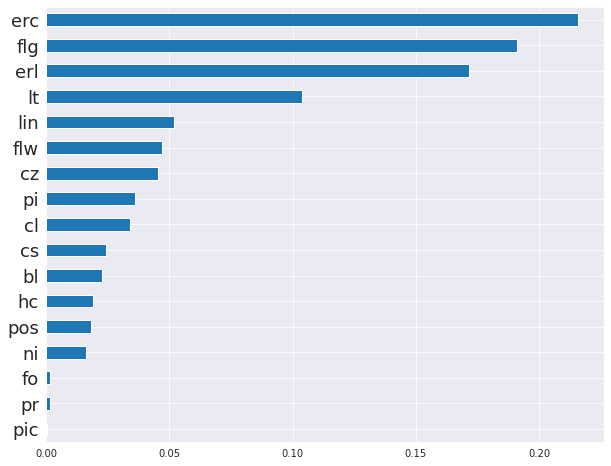

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
feature_importance_rfc.sort_values().plot.barh(ax=ax);
ax.set_yticklabels(ax.get_yticklabels(),fontsize=18);

In [ ]:
#use erc, flg , erl
rfc2 = RandomForestClassifier(max_depth = 9, n_estimators = 23, random_state = 123).fit(x2_train[['erc', 'flg', 'erl']], y2_train)
#test for accuracy
score = rfc2.score(x2_test[['erc', 'flg', 'erl']],y2_test)
print(f'Accuracy score for RandomForestClassifier(max_depth = 9, n_estimators = 23) is = {score:0.4f}')

Accuracy score for RandomForestClassifier(max_depth = 9, n_estimators = 23) is = 0.8699


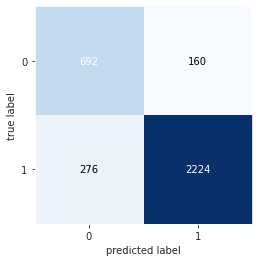

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
rfc2_cm = plot_confusion_matrix(confusion_matrix(y2_test,rfc2.predict(x2_test[['erc', 'flg', 'erl']])));

## Gradient Boosting Classifier

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
mean_scores = []
for rate in [0.05, 0.1, 0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.7,
            0.75, 0.8, 0.85, 0.9,0.95]:
    gbc = GradientBoostingClassifier(learning_rate = rate,random_state = 123)
    scores = cross_val_score(gbc, x2_train, y2_train, cv = 5)
    mean_scores.append((rate, scores.mean().round(4)))
sorted(mean_scores, key=lambda x:x[1],reverse=True)[0]

# we know that the best parameter is learning_rate = 0.5

(0.5, 0.9302)

In [ ]:
gbc_fs = GradientBoostingClassifier(learning_rate = 0.5, random_state = 123).fit(x2_train, y2_train)
feature_importance = pd.Series(gbc_fs.feature_importances_, index = x2_train.columns )
feature_importance.sort_values(ascending = False).round(4)

erc    0.3271
flg    0.2238
erl    0.1083
lin    0.0862
cz     0.0716
flw    0.0690
lt     0.0594
pi     0.0180
bl     0.0091
ni     0.0073
pos    0.0073
cl     0.0041
pr     0.0029
cs     0.0026
hc     0.0025
fo     0.0008
pic    0.0000
dtype: float64

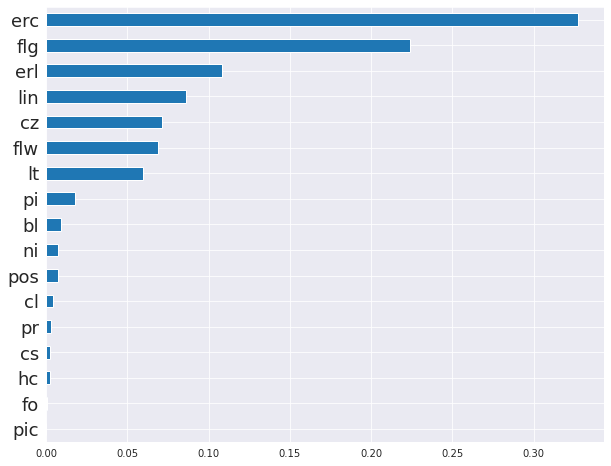

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
feature_importance.sort_values().plot.barh(ax=ax);
ax.set_yticklabels(ax.get_yticklabels(),fontsize=18);

In [ ]:
gbc2 = GradientBoostingClassifier(learning_rate = 0.5, random_state = 123).fit(x2_train[['erc','flg']], y2_train)
#test for accuracy
score = gbc2.score(x2_test[['erc', 'flg']],y2_test)
print(f'Accuracy score for GradientBoostingClassifier(learning_rate = 0.5) is = {score:0.4f}')



Accuracy score for GradientBoostingClassifier(learning_rate = 0.5) is = 0.8431


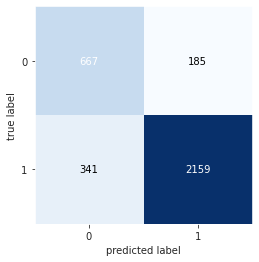

In [ ]:
gbc2_cm = plot_confusion_matrix(confusion_matrix(y2_test,gbc2.predict(x2_test[['erc', 'flg']])));

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
mean_scores = []
for n in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    knn = KNeighborsClassifier(n_neighbors = n)
    scores = cross_val_score(knn, x2_train, y2_train, cv = 5)
    mean_scores.append((n, scores.mean().round(4)))
sorted(mean_scores, key=lambda x:x[1],reverse=True)[0]

(11, 0.8705)

## KNN

In [ ]:
knn2_rfcfeature = KNeighborsClassifier(n_neighbors = 13).fit(x2_train[['erc', 'flg', 'erl']], y2_train)
#test for accuracy
score = knn2_rfcfeature.score(x2_test[['erc', 'flg', 'erl']],y2_test)
print(f'Accuracy score for KNeighborsClassifier(n_neighbors =11) with 3 features is = {score:0.4f}')

Accuracy score for KNeighborsClassifier(n_neighbors =11) with 3 features is = 0.8559


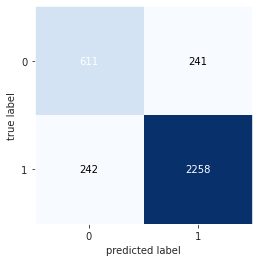

In [ ]:
knn2_rfcfeature_cm = plot_confusion_matrix(confusion_matrix(y2_test,knn2_rfcfeature.predict(x2_test[['erc', 'flg', 'erl']])));

In [ ]:
knn2_gbcfeature = KNeighborsClassifier(n_neighbors = 13).fit(x2_train[['erc','flg']], y2_train)
#test for accuracy
score = knn2_gbcfeature.score(x2_test[['erc', 'flg']],y2_test)
print(f'Accuracy score for KNeighborsClassifier(n_neighbors =11) with 2 features is = {score:0.4f}')

Accuracy score for KNeighborsClassifier(n_neighbors =11) with 2 features is = 0.8323


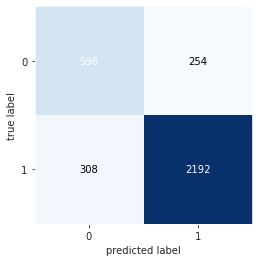

In [ ]:
knn2_gbcfeature_cm = plot_confusion_matrix(confusion_matrix(y2_test,knn2_gbcfeature.predict(x2_test[['erc', 'flg']])));

## Summary

In [ ]:
Accuracy_summary = np.array([[0.8699,0.8431,0.8559,0.8323], 
                             ['RandomForestClassifier', 'GradientBoostingClassifier', 'KNN', 'KNN'],
                             ['max_depth=9, n_estimators = 23', 'learning_rate=0.5', 'n_neighbors=11', 'n_neighbors=11'],
                             ['erc,flg,erl','erc,flg','erc,flg,erl','erc,flg']])
Accuracy_summary.T
Accuracy_df = pd.DataFrame(data = Accuracy_summary.T, columns = ['Accuracy_Score', 'Model', 'Hyperparameter', 'Feature'])
Accuracy_df
Accuracy_df.sort_values(by = 'Accuracy_Score', ascending = False)
Accuracy_df

Accuracy_Score                       Model                  Hyperparameter  \
0         0.8699      RandomForestClassifier  max_depth=9, n_estimators = 23   
1         0.8431  GradientBoostingClassifier               learning_rate=0.5   
2         0.8559                         KNN                  n_neighbors=11   
3         0.8323                         KNN                  n_neighbors=11   

       Feature  
0  erc,flg,erl  
1      erc,flg  
2  erc,flg,erl  
3      erc,flg

In [ ]:
# Now we calculate the recall for each algorithm.
rfc2_cm = confusion_matrix(y2_test,rfc2.predict(x2_test[['erc', 'flg', 'erl']]))
gbc2_cm = confusion_matrix(y2_test,gbc2.predict(x2_test[['erc', 'flg']]))
knn2_rfcfeature_cm = confusion_matrix(y2_test,knn2_rfcfeature.predict(x2_test[['erc', 'flg', 'erl']]))
knn2_gbcfeature_cm = confusion_matrix(y2_test,knn2_gbcfeature.predict(x2_test[['erc', 'flg']]))
cm = [rfc2_cm , gbc2_cm, knn2_rfcfeature_cm, knn2_gbcfeature_cm]
recall_score = []
for matrix in cm:
    score= matrix[1,1]/(matrix[1,1] + matrix[1,0])
    recall_score.append(score)

recall_score

[0.8896, 0.8636, 0.9032, 0.8768]

In [ ]:
Accuracy_df['Recall'] = recall_score
Accuracy_df
Accuracy_df.sort_values(by = 'Recall', ascending = False)

Accuracy_Score                       Model                  Hyperparameter  \
2         0.8559                         KNN                  n_neighbors=11   
0         0.8699      RandomForestClassifier  max_depth=9, n_estimators = 23   
3         0.8323                         KNN                  n_neighbors=11   
1         0.8431  GradientBoostingClassifier               learning_rate=0.5   

       Feature  Recall  
2  erc,flg,erl  0.9032  
0  erc,flg,erl  0.8896  
3      erc,flg  0.8768  
1      erc,flg  0.8636

In [ ]:
precision_score = []
for matrix in cm:
    score = (matrix[1,1]/(matrix[1,1] + matrix[0,1])).round(4)
    precision_score.append(score)

precision_score

[0.9329, 0.9211, 0.9036, 0.8962]

In [ ]:
Accuracy_df['Precision'] = precision_score
Accuracy_df
Accuracy_df.sort_values(by = 'Precision', ascending = False)



Accuracy_Score                       Model                  Hyperparameter  \
0         0.8699      RandomForestClassifier  max_depth=9, n_estimators = 23   
1         0.8431  GradientBoostingClassifier               learning_rate=0.5   
2         0.8559                         KNN                  n_neighbors=11   
3         0.8323                         KNN                  n_neighbors=11   

       Feature  Recall  Precision  
0  erc,flg,erl  0.8896     0.9329  
1      erc,flg  0.8636     0.9211  
2  erc,flg,erl  0.9032     0.9036  
3      erc,flg  0.8768     0.8962

In [ ]:
Accuracy_df

Accuracy_Score                       Model                  Hyperparameter  \
0         0.8699      RandomForestClassifier  max_depth=9, n_estimators = 23   
1         0.8431  GradientBoostingClassifier               learning_rate=0.5   
2         0.8559                         KNN                  n_neighbors=11   
3         0.8323                         KNN                  n_neighbors=11   

       Feature  Recall  Precision  
0  erc,flg,erl  0.8896     0.9329  
1      erc,flg  0.8636     0.9211  
2  erc,flg,erl  0.9032     0.9036  
3      erc,flg  0.8768     0.8962

# 4-class  classification

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [46]:
df = df_original
x = df[['pos', 'cs', 'cl', 'erc', 'erl', 'flg']]  # flg
# pos: Number of total posts that the user has ever posted
# cs: Average cosine similarity of between all pair of two posts a user has
# cl: The average number of character of captions in media
# erc: (num comments) divide by (num media) divide by (num followers)
# erl: (num likes) divide by (num media) divide by (num followers)
y_org = df['class']
y = y_org.copy()
y[y == 'a'] = 0
y[y == 'i'] = 1
y[y == 'r'] = 2
y[y == 's'] = 3
y = y.astype(np.int64)

print(x.shape)
print(y.value_counts())

(43307, 6)
0    12054
1    10549
2    10441
3    10263
Name: class, dtype: int64


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 train_size=.75,
                                                 test_size=.25,
                                                 stratify=y, # maintain label proportions
                                                 random_state=0
                                                )

print(x_test.shape)
print(y_test.value_counts())

(10827, 6)
0    3014
1    2637
2    2610
3    2566
Name: class, dtype: int64


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.fit_transform(x_test))

from sklearn.metrics import accuracy_score, classification_report

## Gradient Boosting Classifier

In [ ]:
# gbc

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

mean_scores = []
for rate in np.linspace(0.05, 1, num=20):
    gbc = GradientBoostingClassifier(learning_rate=rate, random_state=123)
    scores = cross_val_score(gbc, x_train, y_train, cv=5)
    mean_scores.append((rate, scores.mean().round(4)))
sorted(mean_scores, key=lambda x:x[1],reverse=True)[0]

gbc = GradientBoostingClassifier(learning_rate = 0.15, random_state = 123).fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_test)
print(accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

## KNN

In [ ]:
# knn

from sklearn.neighbors import KNeighborsClassifier

mean_scores = []
for n in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    knn = KNeighborsClassifier(n_neighbors = n)
    scores = cross_val_score(knn, x_train, y_train, cv = 5)
    mean_scores.append((n, scores.mean().round(4)))
sorted(mean_scores, key=lambda x:x[1],reverse=True)[0]

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)
print(accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

## Random Forest Classifier

In [ ]:
# rf
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params_rf = {'n_estimators':[i for i in range(10,30)],
             'max_depth':[i for i in range(3,10)]}
rfc = GridSearchCV(RandomForestClassifier(random_state=123), param_grid=params_rf, cv=5, refit=True)
rfc.fit(x_train, y_train)
print(rfc.best_params_)

y_pred_rfc = rfc.predict(x_test)
print(accuracy_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(knn, x, y, cv=3)
cm = confusion_matrix(y, y_pred)
print(cm)

row_sums = cm.sum(axis=1, keepdims=True)
norm_conf_mx = cm / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()